In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv(r"C:\Users\UDAY KIRAN\Downloads\Dry_Bean_Dataset.csv")

In [5]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
data['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

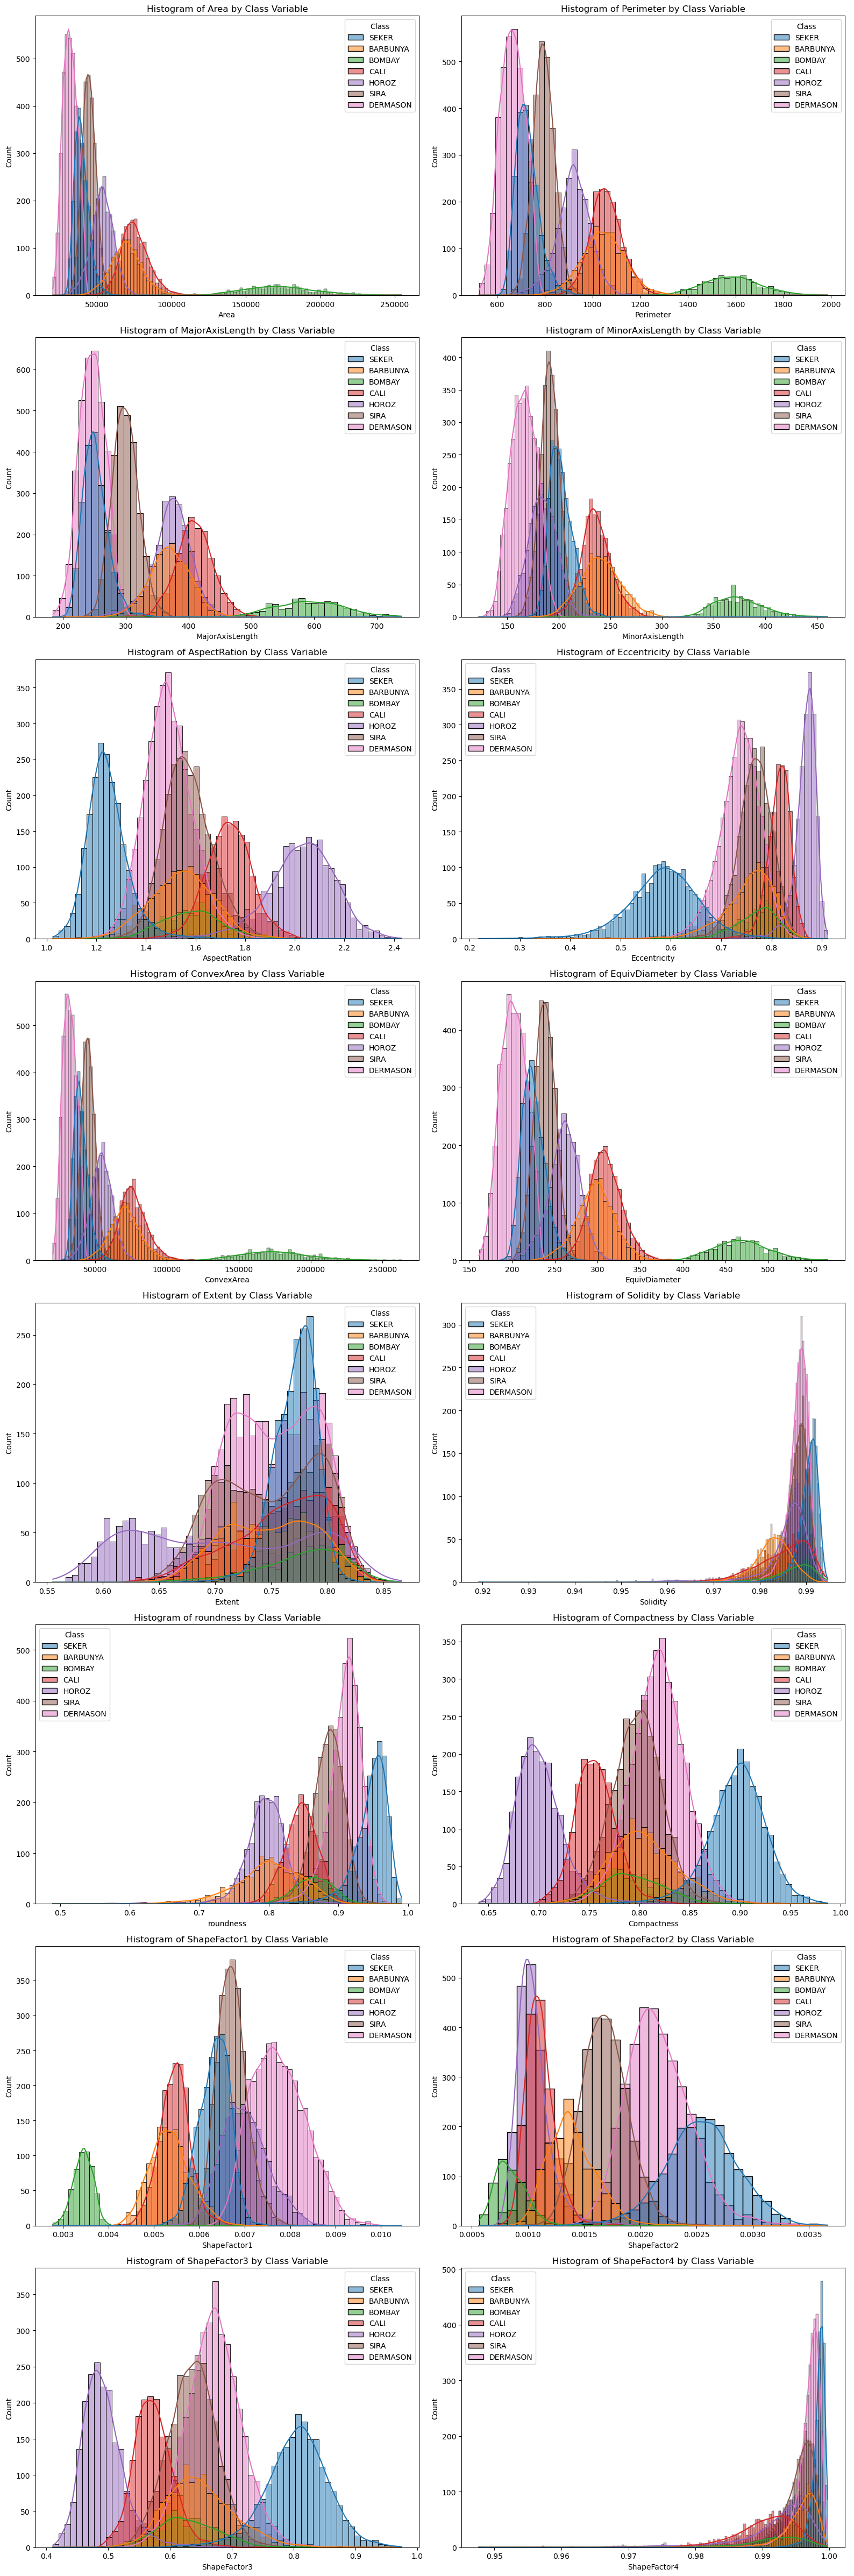

In [9]:
numerical_columns = data.columns[data.columns != 'Class']

num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2

    sns.histplot(data=data, x=column, hue='Class', kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Histogram of {column} by Class Variable')

for i in range(num_plots, num_rows * 2):
    axes[i // 2, i % 2].axis('off')

plt.tight_layout()
plt.show()


In [10]:
fv=data.iloc[:,:16]
cv=data.iloc[:,-1]

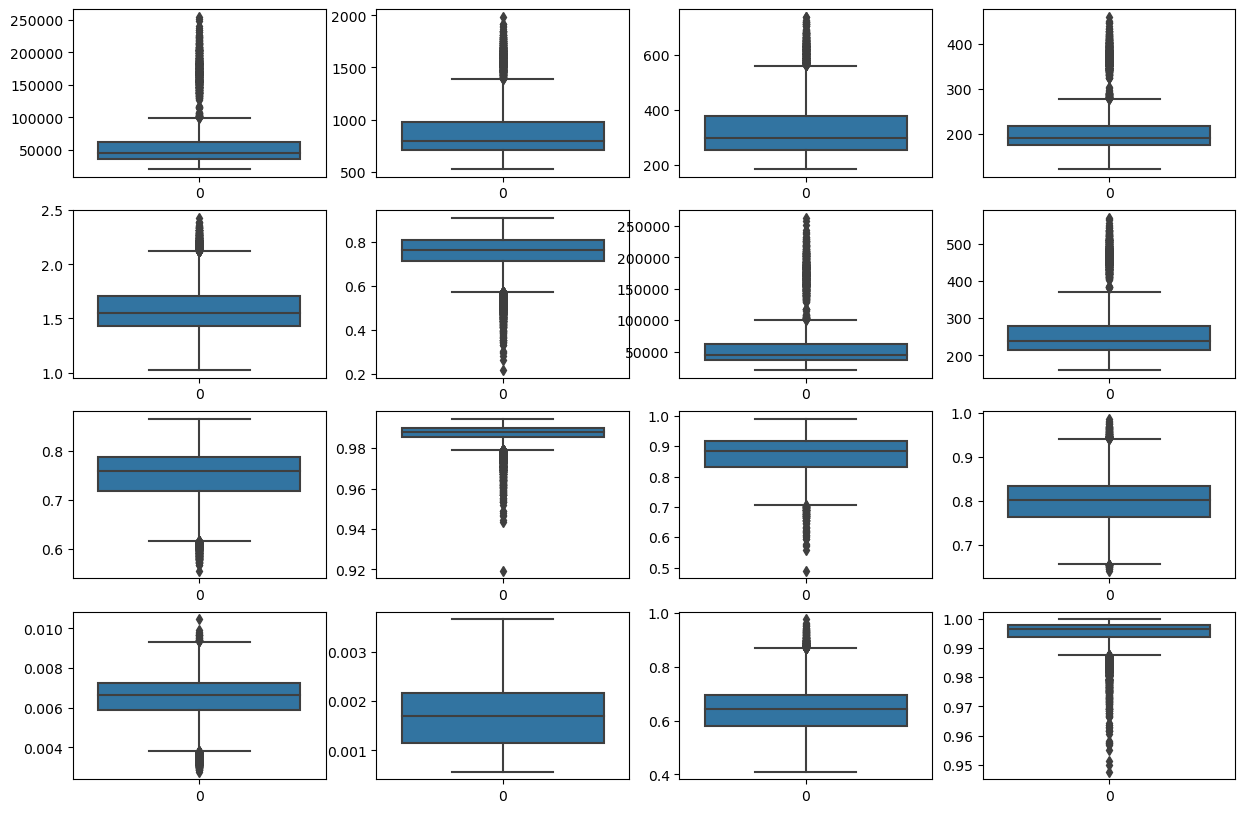

In [11]:

plt.figure(figsize=(15,10))
for i,column in enumerate(fv.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(fv[column])
plt.show()
    
    

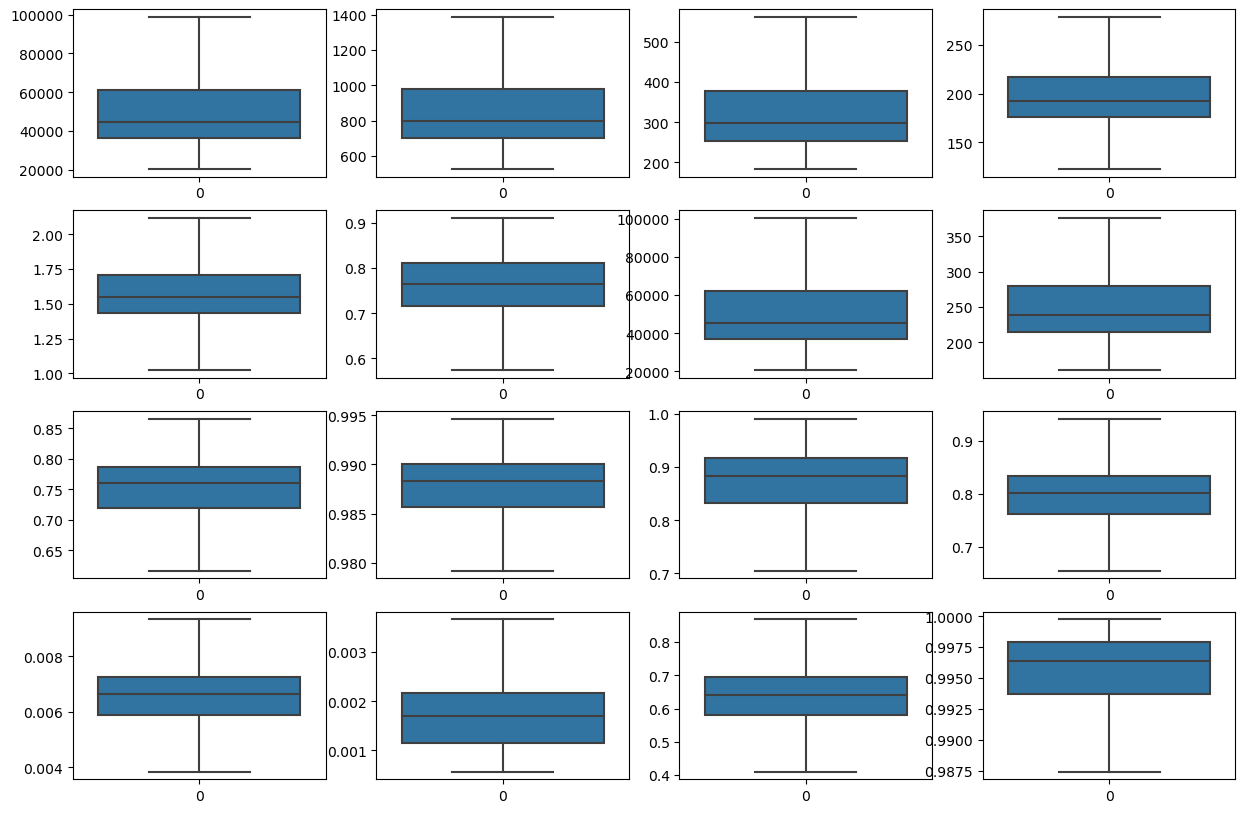

In [12]:
## Remove outliers using IQR method
plt.figure(figsize=(15,10))
for i,column in enumerate(fv.columns):
    IQR=fv[column].quantile(0.75)-fv[column].quantile(0.25)
    upper_limit=fv[column].quantile(0.75)+1.5*IQR
    lower_limit=fv[column].quantile(0.25)-1.5*IQR
    fv[column]=np.clip(fv[column],lower_limit,upper_limit)
    plt.subplot(4,4,i+1)
    sns.boxplot(fv[column])
plt.show()
    
    
    
    

In [13]:
del fv['Extent']
del fv['Solidity']
del fv['ShapeFactor4']
del fv['roundness']
del fv['Compactness']

In [14]:
fv

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,28395,610.291,208.178117,173.888747,1.197191,0.574120,28715.0,190.141097,0.007332,0.003147,0.834222
1,28734,638.018,200.524796,182.734419,1.097356,0.574120,29172.0,191.272751,0.006979,0.003564,0.867978
2,29380,624.110,212.826130,175.931143,1.209713,0.574120,29690.0,193.410904,0.007244,0.003048,0.825871
3,30008,645.884,210.557999,182.516516,1.153638,0.574120,30724.0,195.467062,0.007017,0.003215,0.861794
4,30140,620.134,201.847882,190.279279,1.060798,0.574120,30417.0,195.896503,0.006697,0.003665,0.867978
...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.006858,0.001749,0.642988
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.006688,0.001886,0.676099
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.006681,0.001888,0.676884
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653247,0.006724,0.001852,0.668237


In [15]:
## Divide the feature variables into training and test data

x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [16]:
x_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3
7926,40674,748.346,275.777468,188.399378,1.463792,0.730271,41111.0,227.569210,0.006780,0.001939,0.680941
13111,37783,725.097,276.567189,174.202492,1.587619,0.776697,38182.0,219.332646,0.007320,0.001786,0.628934
8063,41489,797.126,307.077572,173.107997,1.773907,0.825961,42189.0,229.837846,0.007401,0.001433,0.560205
1125,39859,724.609,255.684610,198.752850,1.286445,0.629086,40202.0,225.277729,0.006415,0.002385,0.776296
803,38145,762.943,256.113302,190.105434,1.347217,0.670100,38876.0,220.380858,0.006714,0.002271,0.740429
...,...,...,...,...,...,...,...,...,...,...,...
13531,41221,752.069,280.157423,187.594468,1.493420,0.742719,41590.0,229.094320,0.006796,0.001875,0.668689
477,36186,685.681,236.999293,194.915156,1.215910,0.574120,36484.0,214.647260,0.006549,0.002718,0.820270
2086,52104,906.358,316.915111,209.604091,1.511970,0.750043,53108.0,257.567221,0.006082,0.001637,0.660534
6279,52107,1038.993,393.245196,169.439521,2.119312,0.902412,53645.0,257.574636,0.007547,0.000857,0.429022


In [17]:
norm=MinMaxScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [18]:
x_train=pd.DataFrame(x_train,columns=fv.columns)

In [19]:
k=[]
acc=[]
err=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)
  k.append(n)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\UDAY KIRAN\anaconda3\Lib\site-packag

Text(0.5, 1.0, 'k vs accuracy')

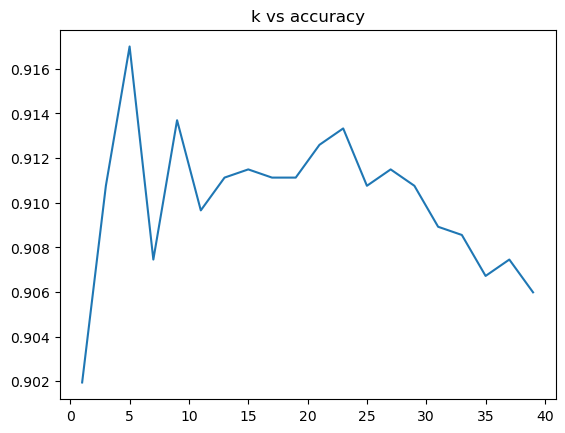

In [20]:
plt.plot(k,acc)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs accuracy')

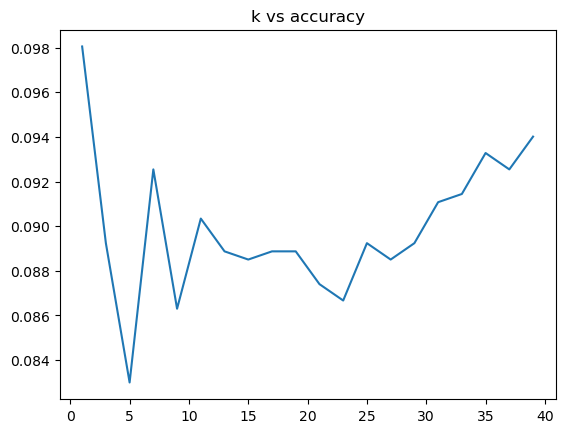

In [21]:
plt.plot(k,err)
plt.title("k vs accuracy")

In [22]:
#Generalised acuuracy score----method2


In [23]:
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=10,stratify=y_train)

In [24]:
k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'K vs accuracy')

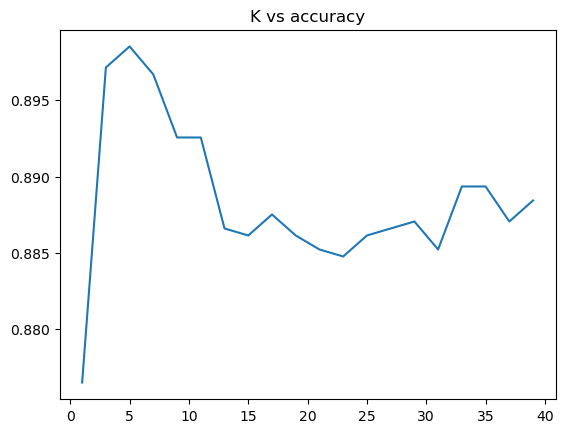

In [25]:
plt.plot(k,acc_cv)
plt.title("K vs accuracy")

In [26]:

k1=[]
tr_err=[]
cv_err=[]
for k in range(1,40,2):
  k1.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  model=knn.fit(x_trainf,y_trainf)
  #training error
  pred_t=model.predict(x_trainf)
  tr_err.append(1-accuracy_score(y_trainf,pred_t))
  #cv error
  pred_cv=model.predict(x_cv)
  cv_err.append(1-accuracy_score(y_cv,pred_cv))

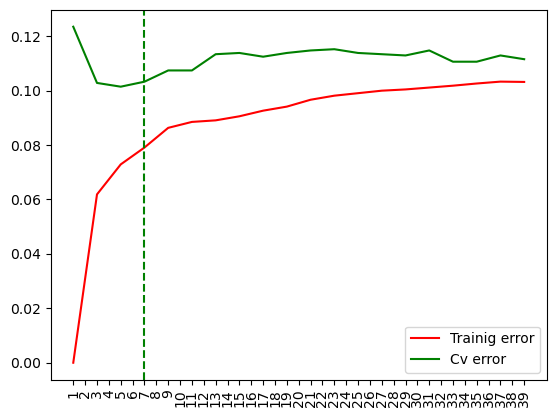

In [27]:
plt.plot(k1,tr_err,label='Trainig error',color='r')
plt.plot(k1,cv_err,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.xticks(range(1,40))
plt.axvline(x=7,color='g',linestyle='--')
plt.legend()

In [28]:
kf=KFold(n_splits=3)

k1=[]
f_acc=[]
for k in range(1,20,2):

  acc=[]
  for train_index,cv_index in kf.split(x_train):
    x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)
    acc.append(accuracy_score(y_cv,predicted))
  f_acc.append(np.mean(np.array(acc)))
  k1.append(k)

In [29]:
final_acc=[]
k1=[]
for k in range(1,40,2):
  final_acc.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k),x_train,y_train,scoring='accuracy',cv=5)))
  k1.append(k)


In [30]:
final_acc

[0.8817053062887613,
 0.8975024390984636,
 0.9026457416694189,
 0.8994308981154934,
 0.8991552051183739,
 0.8981450197468905,
 0.8966756975526342,
 0.8983288010180731,
 0.8962160545615676,
 0.8961245646425418,
 0.8942874690024647,
 0.8941955994572188,
 0.8947466480059288,
 0.8945632885416573,
 0.8929101850762183,
 0.8918076661718872,
 0.8920831904462421,
 0.8922667608139692,
 0.8900625244384379,
 0.8906134464450746]

In [31]:
knn=KNeighborsClassifier(n_neighbors=211)
model=knn.fit(x_trainf,y_trainf)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8905618802791039

In [32]:
knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_trainf,y_trainf)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9085567388909291

# Changing in algorithms


In [33]:
# Brute Force

In [34]:
brutef=KNeighborsClassifier(n_neighbors=7,algorithm='brute')
model=brutef.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


90.85567388909291

In [35]:
 # kd tree

In [36]:
kdtree=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree')
model=kdtree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


90.85567388909291

In [37]:
# ball tree

In [38]:
balltree=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree')
model=balltree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


90.85567388909291

In [39]:
auto=KNeighborsClassifier(n_neighbors=7,algorithm='auto')
model=auto.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

C:\Users\UDAY KIRAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


90.85567388909291

# we've determined that k=7 provides the best accuracy